# <center>Rozwiązywanie układów równań</center>
# <center>Metody iteracyjne</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [2]:
import main
import scipy as sp
import numpy as np
import scipy.sparse.linalg as sp_linalg
import numpy.linalg as np_linalg
import matplotlib
import matplotlib.pyplot as plt

**Cel zajęć:**  
Celem zajęć jest zapoznanie się z iteracyjnymi metodami rozwiązywania układów równań liniowych w postaci macierzowej. Metody iteracyjne, w przeciwieństwie do analitycznych, nie zwracają dokładnego rozwiązania, a jedynie jego przybliżenie. Przy spełnionych kryteriach, przybliżenia obliczane w kolejnych iteracjach są zbieżne do dokładnego rozwiązania. Metody iteracyjne znajdują swoje zastosowanie szczególnie przy dużych układach równań postaci: 
   
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Zdefiniuję funkcję *diag_dominant_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- macierz diagonalnie zdominowana $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy na przekątnej sa wieksze co do modułu od sumy pozostałych w danej kolumnie i wierszu)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje *is_diag_dominant* sprawdzającą czy zadana macierz jest diagonalnie zdominowana

***Zadanie 2***   
Zdefiniuję funkcję *symmetric_matrix_A_b*, przyjmującą paramter całkowity $m>0$ która zwróci:
- symetryczną macierz $\mathbf{A}$ o wymiarach $m \times m$ (wyrazy symetryczne względnej przekątnej są sobie równe)
- wektor $\mathbf{b}$ o wymiarach $m \times 1$ 
 
o losowych wartościach całkowitych

Dodatkowo zdefiniuj funkcje is_symmetric sprawdzającą czy zadana macierz jest symetryczna

***Zadanie 3***   
Zdefiniuję następujące układy równań:

a) $\mathbf{A_1}$, $\mathbf{b_1}$: gdzie $\mathbf{A_1}$ jest macierzą o wymiarach $m \times m$, a $\mathbf{b_1}$ wektorem $m \times 1$, $m = 10$

b) $\mathbf{A_2}$, $\mathbf{b_2}$: gdzie $\mathbf{A_2}$ jest macierzą **diagonalnie zdominowaną** o wymiarach$m \times m$, a $\mathbf{b_2}$ wektorem $m \times 1$, $m = 10$
 
c) $\mathbf{A_3}$, $\mathbf{b_3}$: gdzie $\mathbf{A_3}$ jest macierzą **symetryczną** o wymiarach $m \times m$, a $\mathbf{b_3}$ wektorem $m \times 1$, $m = 10$   
 
**Wskazówka**: Do generacji macierzy użyj metody *random_matrix_Ab* z lab6 oraz metod *diag_dominant_matrix_A_b* i *symmetric_matrix_A_b*

In [139]:
def residual_norm(A, b, x):
    return np.linalg.norm(b - A @ x)

#a)
m = 10
A1, b1 = main.random_matrix_Ab(m)
#b)
A2, b2 = main.diag_dominant_matrix_A_b(m)
#c)
A3, b3 = main.symmetric_matrix_A_b(m)

***Zadanie 4***   
Zaimplementuj iteracyjną metodę *solve_jacobi*, rozwiązującą układ równań metodą Jacobiego zgodnie z dokumentacją w pliku *main.py*.
Szczegóły metody zostały przedstawione na wykładzie.

***Zadanie 5***   
Rozwiąż układ równań z Zadania 3 podpunkt a) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**Metoda Solve**

In [140]:
#1.
res = np.linalg.solve(A1, b1)
print("Norma dla metody solve:", residual_norm(A1, b1, res))

Norma dla metody solve: 2.745491526406121e-13


**Metoda iteracyjna jacobiego**

Macierz nie jest diagonalnie zdominowana - nie można zastosować metody.

**Metoda gradientów sprzężonych**

Nie można zastosować metody - macierz nie jest symetryczna i dodatnio określona

**Metoda GMRES**

Analiza dokładności
0


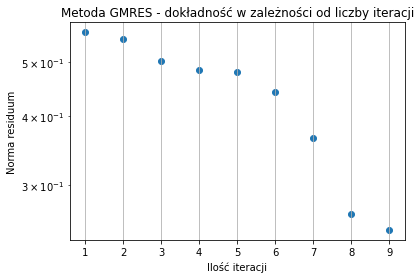

In [141]:
resid = []
def callback_resid(Xn):
    resid.append(Xn)

print("Analiza dokładności")

res, info = sp.sparse.linalg.gmres(A1, b1, maxiter = 10, atol=1.0e-16, callback=callback_resid, callback_type='pr_norm')
print(info)
resid.pop(-1)
num_of_iterations = len(resid)
x = [i+1 for i in range(num_of_iterations)]
plt.scatter(x, resid)
plt.grid()
plt.yscale("log")
plt.title("Metoda GMRES - dokładność w zależności od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Norma residuum")

plt.show()

Analiza czasowa
383 µs ± 73 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
273 µs ± 62.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
238 µs ± 22.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
245 µs ± 25 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
259 µs ± 27.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
255 µs ± 12 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
225 µs ± 19.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
247 µs ± 40.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
241 µs ± 28.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
247 µs ± 30.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
274 µs ± 12.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
285 µs ± 23.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
284 µs ± 15.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
284 µs ± 25 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


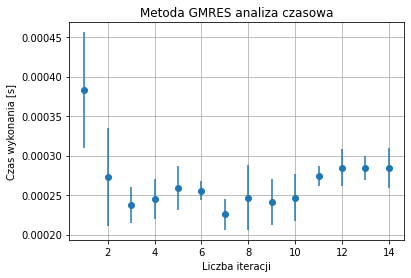

In [142]:
print("Analiza czasowa")

time = []
error = []
size = 15
for iter in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A1, b1, maxiter=iter, atol=1.0e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [iter for iter in range(1,size)]
plt.errorbar(x, time, yerr=error, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda GMRES analiza czasowa")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonania [s]")

plt.show()

***Zadanie 6***     
Rozwiąż układ równań z Zadania 3 podpunkt b) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

**Metoda solve**

In [143]:
res = np.linalg.solve(A2, b2)
print("Norma dla metody solve:", residual_norm(A2, b2, res))

Norma dla metody solve: 2.673771110915334e-15


**Metoda Jacobiego**

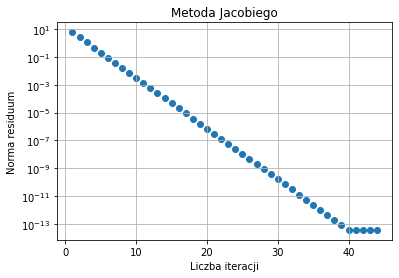

In [144]:
"Analiza dokładności"
resid = []
x_init = np.zeros((10, 1))
_, num_of_iterations = main.solve_jacobi(A2, b2, x_init, epsilon=1.0e-16)
x = [iter+1 for iter in range(num_of_iterations+5)]
if main.is_diag_dominant(A2):
    for it in x:
        result, end_iterator = main.solve_jacobi(A2, b2, x_init, maxiter=it, epsilon=1.0e-16)
        resid.append(residual_norm(A2, b2, result))

plt.scatter(x, resid)
plt.yscale('log')
plt.grid()
plt.title("Metoda Jacobiego")
plt.xlabel("Liczba iteracji")
plt.ylabel("Norma residuum")
plt.show()

172 µs ± 59.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
244 µs ± 82.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
322 µs ± 56.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
411 µs ± 34.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
380 µs ± 13.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
387 µs ± 20.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
387 µs ± 23 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
404 µs ± 34 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
400 µs ± 28.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
389 µs ± 20.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


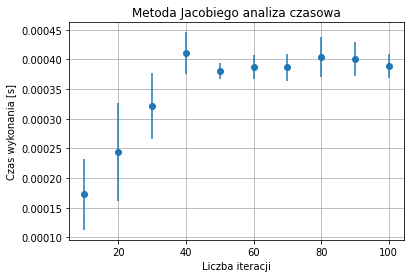

In [146]:
"Analiza czasu wykonania"

time = []
error = []
size = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
for iter in size:
    avg_time = %timeit -r 5 -n 10 -o main.solve_jacobi(A2, b2, x_init, maxiter=iter, epsilon = 1.0e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

plt.errorbar(size, time, yerr=error, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda Jacobiego analiza czasowa")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonania [s]")

plt.show()

**Metoda gradientów sprężonych**

Nie można zastosować metody - macierz nie jest symetryczna i dodatnio określona

**Metoda GMRES**

Analiza dokładności
0


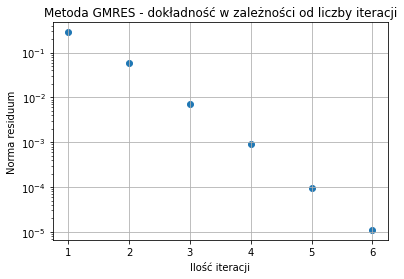

In [149]:
resid = []
def callback_resid(Xn):
    resid.append(Xn)

print("Analiza dokładności")

res, info = sp.sparse.linalg.gmres(A2, b2, maxiter = 10, atol=1.0e-16, callback=callback_resid, callback_type='pr_norm')
print(info)
resid.pop(-1)
num_of_iterations = len(resid)
x = [i+1 for i in range(num_of_iterations)]
plt.scatter(x, resid)
plt.grid()
plt.yscale("log")
plt.title("Metoda GMRES - dokładność w zależności od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Norma residuum")

plt.show()

Analiza czasowa
332 µs ± 110 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
241 µs ± 55 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
211 µs ± 8.42 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
206 µs ± 34.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
193 µs ± 30 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
191 µs ± 20.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
183 µs ± 16.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
200 µs ± 29.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
194 µs ± 27.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
207 µs ± 24.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
219 µs ± 7.07 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
211 µs ± 6.07 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
211 µs ± 38.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
211 µs ± 12.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


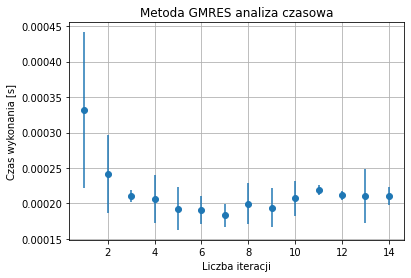

In [150]:
print("Analiza czasowa")

time = []
error = []
size = 15
for iter in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A2, b2, maxiter=iter, atol=1.0e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [iter for iter in range(1,size)]
plt.errorbar(x, time, yerr=error, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda GMRES analiza czasowa")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonania [s]")

plt.show()

***Zadanie 7***   
Rozwiąż układ równań z Zadania 3 podpunkt c) przy pomocy:

- funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)* z biblioteki numpy

- zaimplementowanej iteracyjnej metody *solve_jacobi*

- iteracyjnej metody *[gradientów sprzężonych](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.cg.html)*
 z biblioteki scipy

- iteracyjnej metody *[GMRES](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.linalg.gmres.html)*
 z biblioteki scipy

Przed każdą metodą sprawdź czy warunki dotyczące macierzy dla danej metody są spełnione. Zbadaj dokładność i czas obliczeń metod w zależności od liczby iteracji. Wyniki przedstaw na wykresach.

#gradienty - dla macierzy sprzężonych

**Metoda solve**

In [151]:
res = np.linalg.solve(A3, b3)
print("Norma dla metody solve:", residual_norm(A3, b3, res))

Norma dla metody solve: 4.550560269027492e-15


**Metoda Jacobiego**

Nie możemy jej użyć - macierz nie jest diagonalnie zdominowana

**Metoda gradientu sprzężonego**

Analiza dokładności
Zbieżność:  0


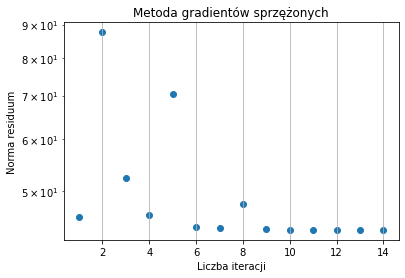

In [152]:
resid = []
print("Analiza dokładności")
x_init = np.zeros((10,1))
if main.is_symmetric(A3):
    for iter in range(1, 15):
        res, info = sp.sparse.linalg.cg(A3, b3, x0=x_init, maxiter = iter, callback=None, atol=1.0e-16)
        resid.append(np.linalg.norm(b3 - A3@res))

    print("Zbieżność: ", info)
    num_of_iterations = len(resid)
    x = [iter+1 for iter in range(num_of_iterations)]
    plt.scatter(x, resid)
    plt.grid()
    plt.title("Metoda gradientów sprzężonych")
    plt.xlabel("Liczba iteracji")
    plt.yscale('log')
    plt.ylabel("Norma residuum")
    plt.show()

Analiza czasowa
128 µs ± 41.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
144 µs ± 56.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
120 µs ± 15.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
149 µs ± 1.56 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
167 µs ± 27.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
207 µs ± 12.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
252 µs ± 3.14 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
251 µs ± 11.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
257 µs ± 63.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
269 µs ± 44.3 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
265 µs ± 30 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
270 µs ± 27.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
278 µs ± 27.7 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
295 µs ± 36.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


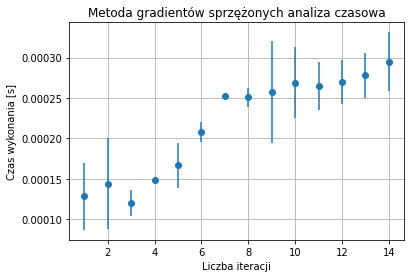

In [153]:
print("Analiza czasowa")

time = []
error = []
size = 15
for iter in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.cg(A3, b3, maxiter=iter, atol=1.0e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [iter for iter in range(1,size)]
plt.errorbar(x, time, yerr=error, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda gradientów sprzężonych analiza czasowa")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonania [s]")

plt.show()

**Metoda GMRES**

Analiza dokładności
0


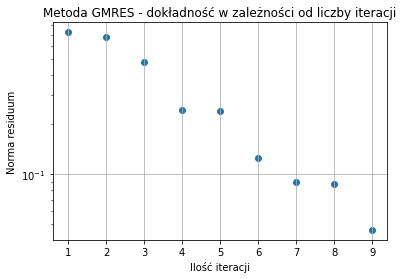

In [154]:
resid = []
def callback_resid(Xn):
    resid.append(Xn)

print("Analiza dokładności")

res, info = sp.sparse.linalg.gmres(A3, b3, maxiter = 10, atol=1.0e-16, callback=callback_resid, callback_type='pr_norm')
print(info)
resid.pop(-1)
num_of_iterations = len(resid)
x = [i+1 for i in range(num_of_iterations)]
plt.scatter(x, resid)
plt.grid()
plt.yscale("log")
plt.title("Metoda GMRES - dokładność w zależności od liczby iteracji")
plt.xlabel("Ilość iteracji")
plt.ylabel("Norma residuum")

plt.show()

Analiza czasowa
330 µs ± 121 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
272 µs ± 37.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
257 µs ± 29.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
236 µs ± 24.8 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
241 µs ± 35.2 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
267 µs ± 6.35 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
229 µs ± 25.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
230 µs ± 25.9 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
241 µs ± 20.1 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
254 µs ± 31.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
232 µs ± 27 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
228 µs ± 34.6 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
263 µs ± 18.5 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)
228 µs ± 25.4 µs per loop (mean ± std. dev. of 5 runs, 10 loops each)


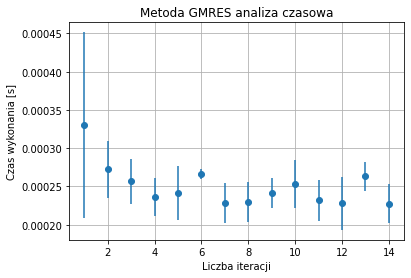

In [155]:
print("Analiza czasowa")

time = []
error = []
size = 15
for iter in range(1, size):
    avg_time = %timeit -r 5 -n 10 -o sp.sparse.linalg.gmres(A3, b3, maxiter=iter, atol=1.0e-16)
    time.append(avg_time.average)
    error.append(avg_time.stdev)

x = [iter for iter in range(1,size)]
plt.errorbar(x, time, yerr=error, linestyle="None", marker="o")
plt.grid()
plt.title("Metoda GMRES analiza czasowa")
plt.xlabel("Liczba iteracji")
plt.ylabel("Czas wykonania [s]")

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)